In [82]:
##Name:Ruichao Ma
##1(a)
##References: https://www.daniweb.com/programming/software-development/threads/497685/using-pandas-to-merge-concatenate-multiple-csv-files-into-one-csv-file
import pandas as pd
import csv
import glob
import os
import seaborn as sns
path = '../data/AReM'
data={}
files_in_dir = [f for f in os.listdir(path)]
print(files_in_dir)
features = ['Time','Avg_RSS12', 'Var_RSS12', 'Avg_RSS13', 'Var_RSS13', 'Avg_RSS23', 'Var_RSS23']
for filenames in files_in_dir:
    Datasets = os.listdir("../data/AReM/" + filenames)
    for Data in Datasets:
        if filenames == "bending2" and Data == "dataset4.csv":
            new_features = ['Time','Avg_RSS12', 'Var_RSS12', 'Avg_RSS13', 'Var_RSS13', 'Avg_RSS23', 'Var_RSS23','reduntant']
            data[filenames + Data] = pd.read_csv("../data/AReM/" + filenames + "/" + Data, delimiter=' ', skiprows = 5, names=new_features).drop(["reduntant"], axis=1)
        else:
            data[filenames + Data] = pd.read_csv("../data/AReM/" + filenames + "/" + Data,skiprows = 5,names=features)

['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']


In [10]:
##1(b)
testing_dataset = {}
training_dataset = {}
for index, value in data.items():
    if index in ['bending1dataset1.csv', 'bending1dataset2.csv',
                 'bending2dataset1.csv', 'bending2dataset2.csv',                
                 'cyclingdataset1.csv', 'cyclingdataset2.csv', 'cyclingdataset3.csv', 
                 'lyingdataset1.csv', 'lyingdataset2.csv', 'lyingdataset3.csv',
                 'sittingdataset1.csv', 'sittingdataset2.csv', 'sittingdataset3.csv',
                 'standingdataset1.csv', 'standingdataset2.csv', 'standingdataset3.csv',
                 'walkingdataset1.csv', 'walkingdataset2.csv', 'walkingdataset3.csv']:
        
                   
        testing_dataset[index] = value
    else:
        training_dataset[index]= value


In [11]:
##1C(i):
##mean, median, minimum, maximum, interquatile range, variance, standard deviation, first quantile, third quantile,
##and range(max-min)


In [12]:
##1c(ii)
total = []
count = 1
for i in list(data.values()):
    Statistics = [count]
    feature = [" "]
    for index, col in enumerate(i.columns[1:]):
        minimum = min(i[col])
        Statistics.append(minimum)
        feature.append(col + "minimum")
        
        maximum = max(i[col])
        Statistics.append(maximum)
        feature.append(col + "maximum")
        
        mean = i[col].mean()
        Statistics.append(mean)
        feature.append(col + "mean")
        
        
        median = i[col].median()
        Statistics.append(median)
        feature.append(col + "median")
        
        sd = i[col].std()
        Statistics.append(sd)
        feature.append(col + "standard deviation")
        
        
        Q1 = i[col].quantile(0.25)
        Statistics.append(Q1)
        feature.append(col + "first quartile")
        
        Q3 = i[col].quantile(0.75)
        Statistics.append(Q3)
        feature.append(col + "third quartile")
        
    count+=1
    total.append(Statistics)

time_domain_feature = pd.DataFrame(total, columns=feature)
time_domain_feature

,,Avg_RSS12minimum,Avg_RSS12maximum,Avg_RSS12mean,Avg_RSS12median,Avg_RSS12standard deviation,Avg_RSS12first quartile,Avg_RSS12third quartile,Var_RSS12minimum,Var_RSS12maximum,...,Avg_RSS23standard deviation,Avg_RSS23first quartile,Avg_RSS23third quartile,Var_RSS23minimum,Var_RSS23maximum,Var_RSS23mean,Var_RSS23median,Var_RSS23standard deviation,Var_RSS23first quartile,Var_RSS23third quartile
0,1,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,...,2.188449,33.0000,36.0000,0.00,1.92,0.570583,0.430,0.582915,0.0000,1.3000
1,2,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,...,1.995255,32.0000,34.5000,0.00,3.11,0.571083,0.430,0.601010,0.0000,1.3000
2,3,35.00,47.40,43.954500,44.330,1.558835,43.0000,45.0000,0.0,1.70,...,1.999604,35.3625,36.5000,0.00,1.79,0.493292,0.430,0.513506,0.0000,0.9400
3,4,33.00,47.75,42.179813,43.500,3.670666,39.1500,45.0000,0.0,3.00,...,3.849448,30.4575,36.3300,0.00,2.18,0.613521,0.500,0.524317,0.0000,1.0000
4,5,33.00,45.75,41.678063,41.750,2.243490,41.3300,42.7500,0.0,2.83,...,2.411026,28.4575,31.2500,0.00,1.79,0.383292,0.430,0.389164,0.0000,0.5000
5,6,37.00,48.00,43.454958,43.250,1.386098,42.5000,45.0000,0.0,1.58,...,2.488862,22.2500,24.0000,0.00,5.26,0.679646,0.500,0.622534,0.4300,0.8700
6,7,36.25,48.00,43.969125,44.500,1.618364,43.3100,44.6700,0.0,1.50,...,3.318301,20.5000,23.7500,0.00,2.96,0.555313,0.490,0.487826,0.0000,0.8300
7,8,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,...,3.693786,20.5000,27.0000,0.00,4.97,0.700188,0.500,0.693720,0.4300,0.8700
8,9,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,...,5.053642,15.0000,20.7500,0.00,6.76,1.122125,0.830,1.012342,0.4700,1.3000
9,10,21.00,50.00,32.586208,33.000,6.238143,26.1875,34.5000,0.0,9.90,...,5.032424,17.6700,23.5000,0.00,13.61,1.162042,0.830,1.332980,0.4700,1.3000


In [13]:
##1c(iii)
##Estimate the standard deviation of each of the time-domain features you extracted from the data
import numpy as np
from sklearn.utils import resample
Statistics = []
feature = []
total = []
for index, col in enumerate(time_domain_feature.columns[0:]):
    sd = time_domain_feature[col].std()
    Statistics.append(sd)
    feature.append(col + " standard deviation")
total.append(Statistics)

time_domain_feature_sd = pd.DataFrame(total, columns=feature)  
time_domain_feature_sd  

    

,standard deviation,Avg_RSS12minimum standard deviation,Avg_RSS12maximum standard deviation,Avg_RSS12mean standard deviation,Avg_RSS12median standard deviation,Avg_RSS12standard deviation standard deviation,Avg_RSS12first quartile standard deviation,Avg_RSS12third quartile standard deviation,Var_RSS12minimum standard deviation,Var_RSS12maximum standard deviation,...,Avg_RSS23standard deviation standard deviation,Avg_RSS23first quartile standard deviation,Avg_RSS23third quartile standard deviation,Var_RSS23minimum standard deviation,Var_RSS23maximum standard deviation,Var_RSS23mean standard deviation,Var_RSS23median standard deviation,Var_RSS23standard deviation standard deviation,Var_RSS23first quartile standard deviation,Var_RSS23third quartile standard deviation
0,25.547342,9.569975,4.394362,5.335718,5.440054,1.772153,6.15359,5.138925,0.0,5.062729,...,1.024898,6.096465,5.53172,0.045838,2.518921,1.154812,1.086474,0.517617,0.758584,1.523599


In [14]:
##use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation
##of each feature
Statistics = []
feature = []
total = []
for index, col in enumerate(time_domain_feature.columns[0:]):
    sd = time_domain_feature[col].std()
    Statistics.append(sd)
    feature.append(col + " standard deviation")
total.append(Statistics)


list_statistics = list(Statistics)
confidence_interval=list()
alpha = 0.90
stats_size = len(list_statistics)
for i in time_domain_feature.columns:
    sp = np.random.choice(time_domain_feature[i],(stats_size, 2000))
    std = sp.std(axis=0)
    std.sort()
    confidence_interval.append([i,np.percentile(std, [5, 95])])
confidence_interval    

[[' ', array([22.1654942 , 27.96980041])],
 ['Avg_RSS12minimum', array([ 7.67897941, 11.23799968])],
 ['Avg_RSS12maximum', array([2.8280766 , 5.60803546])],
 ['Avg_RSS12mean', array([4.43076725, 6.04735004])],
 ['Avg_RSS12median', array([4.47947686, 6.16662909])],
 ['Avg_RSS12standard deviation', array([1.4736579 , 2.00063259])],
 ['Avg_RSS12first quartile', array([5.24553923, 6.83125621])],
 ['Avg_RSS12third quartile', array([3.92750839, 6.04942481])],
 ['Var_RSS12minimum', array([0., 0.])],
 ['Var_RSS12maximum', array([4.39799063, 5.50639329])],
 ['Var_RSS12mean', array([1.27778049, 1.74202024])],
 ['Var_RSS12median', array([1.140155  , 1.58257146])],
 ['Var_RSS12standard deviation', array([0.74903526, 0.95450678])],
 ['Var_RSS12first quartile', array([0.76821421, 1.05721846])],
 ['Var_RSS12third quartile', array([1.76252263, 2.35119621])],
 ['Avg_RSS13minimum', array([2.63740964, 3.15830749])],
 ['Avg_RSS13maximum', array([3.81420703, 5.61838558])],
 ['Avg_RSS13mean', array([3.11130

In [15]:
##1(c)iv:
## I will choose min,max,mean as my three most important time domain features

In [16]:
##1d(i)
total = []
count = 1
for i in list(training_dataset.values()):
    Statistics = [count]
    feature = [" "]
    for index, col in enumerate(i.columns[1:]):
        minimum = min(i[col])
        Statistics.append(minimum)
        feature.append(col + "minimum")
        
        maximum = max(i[col])
        Statistics.append(maximum)
        feature.append(col + "maximum")
        
        mean = i[col].mean()
        Statistics.append(mean)
        feature.append(col + "mean")
        
        
        median = i[col].median()
        Statistics.append(median)
        feature.append(col + "median")
        
        sd = i[col].std()
        Statistics.append(sd)
        feature.append(col + "standard deviation")
        
        
        Q1 = i[col].quantile(0.25)
        Statistics.append(Q1)
        feature.append(col + "first quartile")
        
        Q3 = i[col].quantile(0.75)
        Statistics.append(Q3)
        feature.append(col + "third quartile")
        
    count+=1
    total.append(Statistics)

time_domain_feature_training = pd.DataFrame(total, columns=feature)
time_domain_feature_training
##Since extracted from time series 1, 2, and 6 of each instance, which means avg_rss12, var_rss12，var_rss23
extracted_features = time_domain_feature_training[['Avg_RSS12minimum','Avg_RSS12maximum','Avg_RSS12mean','Var_RSS12minimum','Var_RSS12maximum','Var_RSS12mean',
                                         'Var_RSS23minimum','Var_RSS23maximum','Var_RSS23mean']]

##Since we need to differeniate bending vs other activity
##we know that training data of bending constitutes of bending1 and bending2, which total contain 5+5=10 dataset, For dataframe
##in 1c, the first 10 rows of data are bending data, remaining are other activities.
bending_data = [1]*10+[0]*(69-10)
extracted_features['merged_bending'] = bending_data




C:\Users\Ruich\OneDrive\Pictures\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\Ruich\OneDrive\Pictures\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ruich\OneDrive\Pictures\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


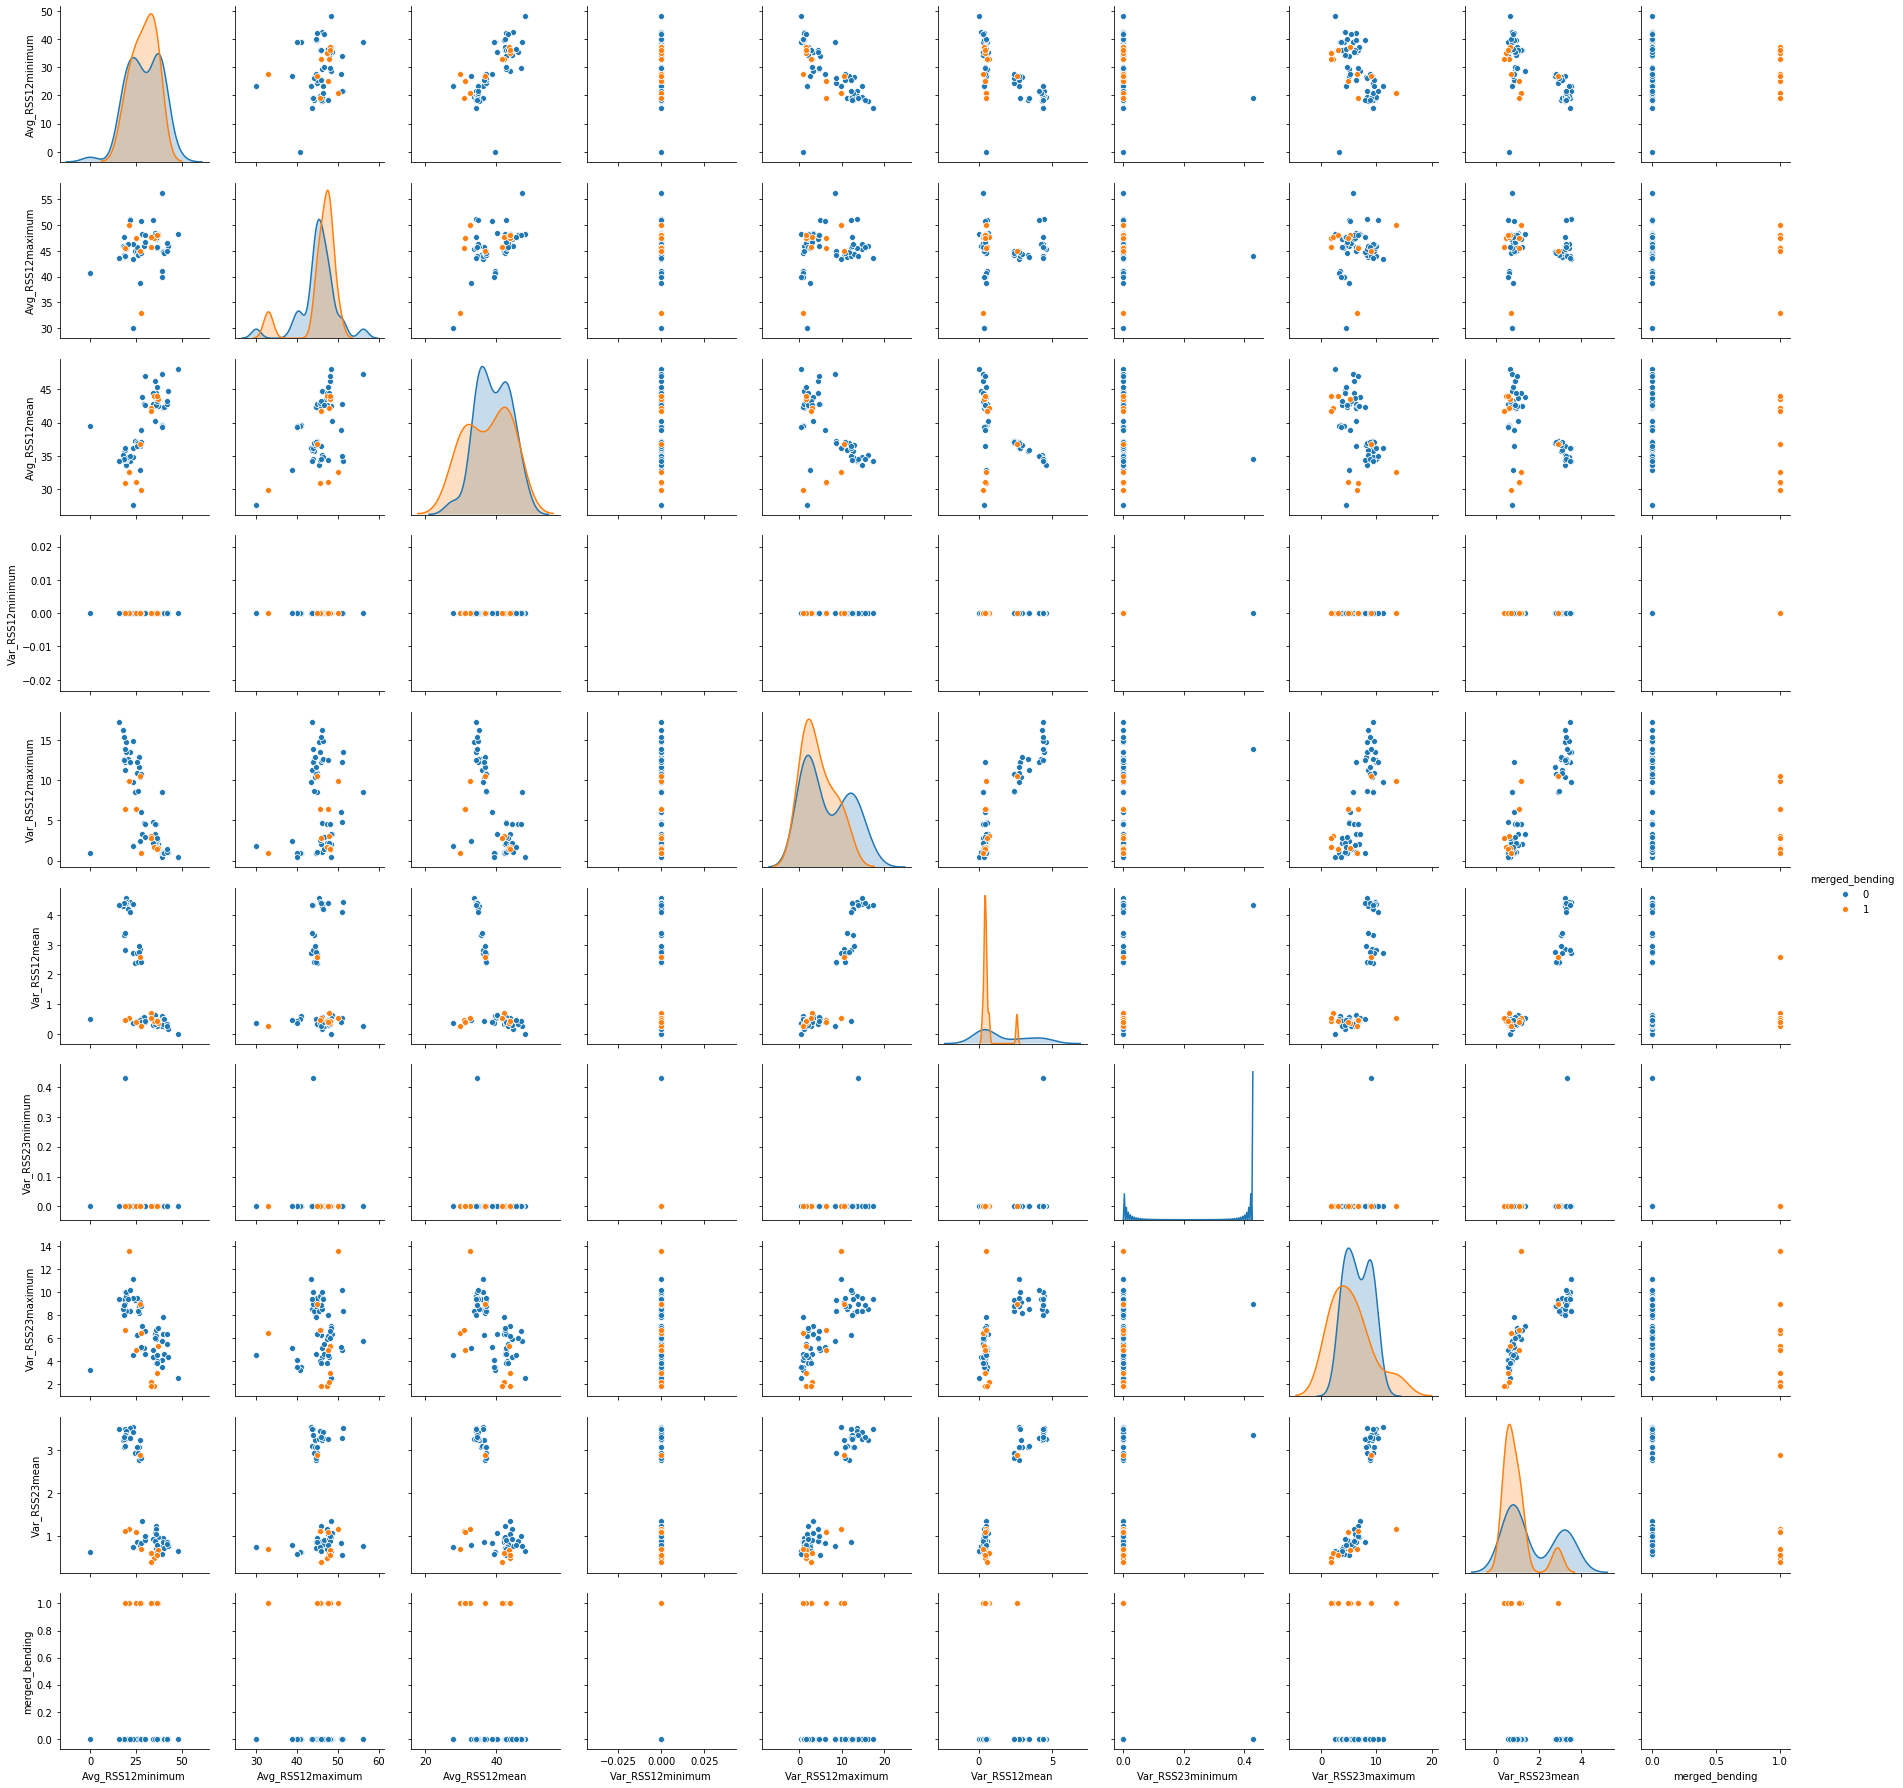

In [17]:
sns.pairplot(extracted_features,hue='merged_bending')
##bending data are blue points and other activities' data are yellow point.

In [18]:
##i(d)ii
split_data={}
for index, value in training_dataset.items():
    avg_rss12_firsthalf = value['Avg_RSS12'][0:239]
    avg_rss12_secondhalf= value['Avg_RSS12'][239:478]
    var_rss12_firsthalf = value['Var_RSS12'][0:239]
    var_rss12_secondhalf= value['Var_RSS12'][239:478]
    avg_rss13_firsthalf = value['Avg_RSS13'][0:239]
    avg_rss13_secondhalf= value['Avg_RSS13'][239:478]
    var_rss13_firsthalf = value['Var_RSS13'][0:239]
    var_rss13_secondhalf= value['Var_RSS13'][239:478]
    avg_rss23_firsthalf = value['Avg_RSS23'][0:239]
    avg_rss23_secondhalf= value['Avg_RSS23'][239:478]
    var_rss23_firsthalf = value['Var_RSS23'][0:239]
    var_rss23_secondhalf= value['Var_RSS23'][239:478]
    
    split_data[index] = pd.DataFrame({
                                         'Avg_RSS12_firsthalf': list(avg_rss12_firsthalf),
                                         'Var_RSS12_firsthalf': list(var_rss12_firsthalf),
                                         'Avg_RSS13_firsthalf': list(avg_rss13_firsthalf),
                                         'Var_RSS13_firsthalf': list(var_rss13_firsthalf),
                                         'Avg_RSS23_firsthalf': list(avg_rss23_firsthalf),
                                         'Var_RSS23_firsthalf': list(var_rss23_firsthalf),
                                         'Avg_RSS12_secondhalf': list(avg_rss12_secondhalf),
                                         'Var_RSS12_secondhalf': list(var_rss12_secondhalf),
                                         'Avg_RSS13_secondhalf': list(avg_rss13_secondhalf),
                                         'Var_RSS13_secondhalf': list(var_rss13_secondhalf),
                                         'Avg_RSS23_secondhalf': list(avg_rss23_secondhalf),
                                         'Var_RSS23_secondhalf': list(var_rss23_secondhalf),
                                           
                                        })


In [19]:
total = []
count = 1
for i in list(split_data.values()):
    Statistics = [count]
    feature = [" "]
    for index, col in enumerate(i.columns[0:]):
        minimum = min(i[col])
        Statistics.append(minimum)
        feature.append(col + "minimum")
        
        maximum = max(i[col])
        Statistics.append(maximum)
        feature.append(col + "maximum")
        
        mean = i[col].mean()
        Statistics.append(mean)
        feature.append(col + "mean")
        
        
        median = i[col].median()
        Statistics.append(median)
        feature.append(col + "median")
        
        sd = i[col].std()
        Statistics.append(sd)
        feature.append(col + "standard deviation")
        
        
        Q1 = i[col].quantile(0.25)
        Statistics.append(Q1)
        feature.append(col + "first quartile")
        
        Q3 = i[col].quantile(0.75)
        Statistics.append(Q3)
        feature.append(col + "third quartile")
        
    count+=1
    total.append(Statistics)

time_domain_feature_splitdata = pd.DataFrame(total, columns=feature)
time_domain_feature_splitdata

,,Avg_RSS12_firsthalfminimum,Avg_RSS12_firsthalfmaximum,Avg_RSS12_firsthalfmean,Avg_RSS12_firsthalfmedian,Avg_RSS12_firsthalfstandard deviation,Avg_RSS12_firsthalffirst quartile,Avg_RSS12_firsthalfthird quartile,Var_RSS12_firsthalfminimum,Var_RSS12_firsthalfmaximum,...,Avg_RSS23_secondhalfstandard deviation,Avg_RSS23_secondhalffirst quartile,Avg_RSS23_secondhalfthird quartile,Var_RSS23_secondhalfminimum,Var_RSS23_secondhalfmaximum,Var_RSS23_secondhalfmean,Var_RSS23_secondhalfmedian,Var_RSS23_secondhalfstandard deviation,Var_RSS23_secondhalffirst quartile,Var_RSS23_secondhalfthird quartile
0,1,36.50,46.50,44.060544,44.50,1.559358,43.250,45.000,0.0,1.50,...,2.302375,33.000,36.250,0.00,1.50,0.389958,0.00,0.478868,0.000,0.710
1,2,33.75,47.75,43.275858,45.00,3.480329,42.000,45.250,0.0,3.00,...,3.777319,28.750,33.750,0.00,2.18,0.586736,0.47,0.492800,0.000,0.870
2,3,33.00,45.75,41.618577,42.33,3.124922,39.635,44.250,0.0,2.83,...,2.068707,28.290,30.875,0.00,1.50,0.346862,0.43,0.363771,0.000,0.500
3,4,39.00,48.00,44.118912,45.00,1.362381,43.500,45.000,0.0,1.30,...,1.723902,22.500,23.750,0.00,4.06,0.529833,0.50,0.441995,0.430,0.710
4,5,36.67,45.00,43.487197,43.75,1.284575,42.330,44.500,0.0,1.12,...,1.949490,21.000,23.500,0.00,2.96,0.586987,0.50,0.488943,0.415,0.830
5,6,21.00,50.00,32.003975,26.00,8.760326,24.710,42.000,0.0,9.90,...,3.021424,16.875,20.000,0.00,6.02,0.781674,0.50,0.771562,0.470,0.940
6,7,29.00,33.00,30.718536,30.33,0.935121,30.000,31.500,0.0,1.00,...,1.332781,17.330,19.250,0.00,1.50,0.675690,0.71,0.322402,0.470,0.940
7,8,19.00,39.25,29.224142,27.00,6.207188,26.000,36.000,0.0,4.33,...,7.136772,14.415,24.625,0.00,5.61,1.117657,0.87,0.997631,0.470,1.300
8,9,25.00,47.50,34.127824,30.50,5.100946,30.000,39.415,0.0,6.38,...,3.606081,8.330,13.750,0.00,4.92,1.208117,1.00,0.835061,0.710,1.410
9,10,29.67,44.00,36.784644,36.00,3.679634,33.750,40.000,0.0,10.47,...,3.010187,15.290,20.000,0.00,8.99,3.167866,2.86,1.820202,1.905,4.105


C:\Users\Ruich\OneDrive\Pictures\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


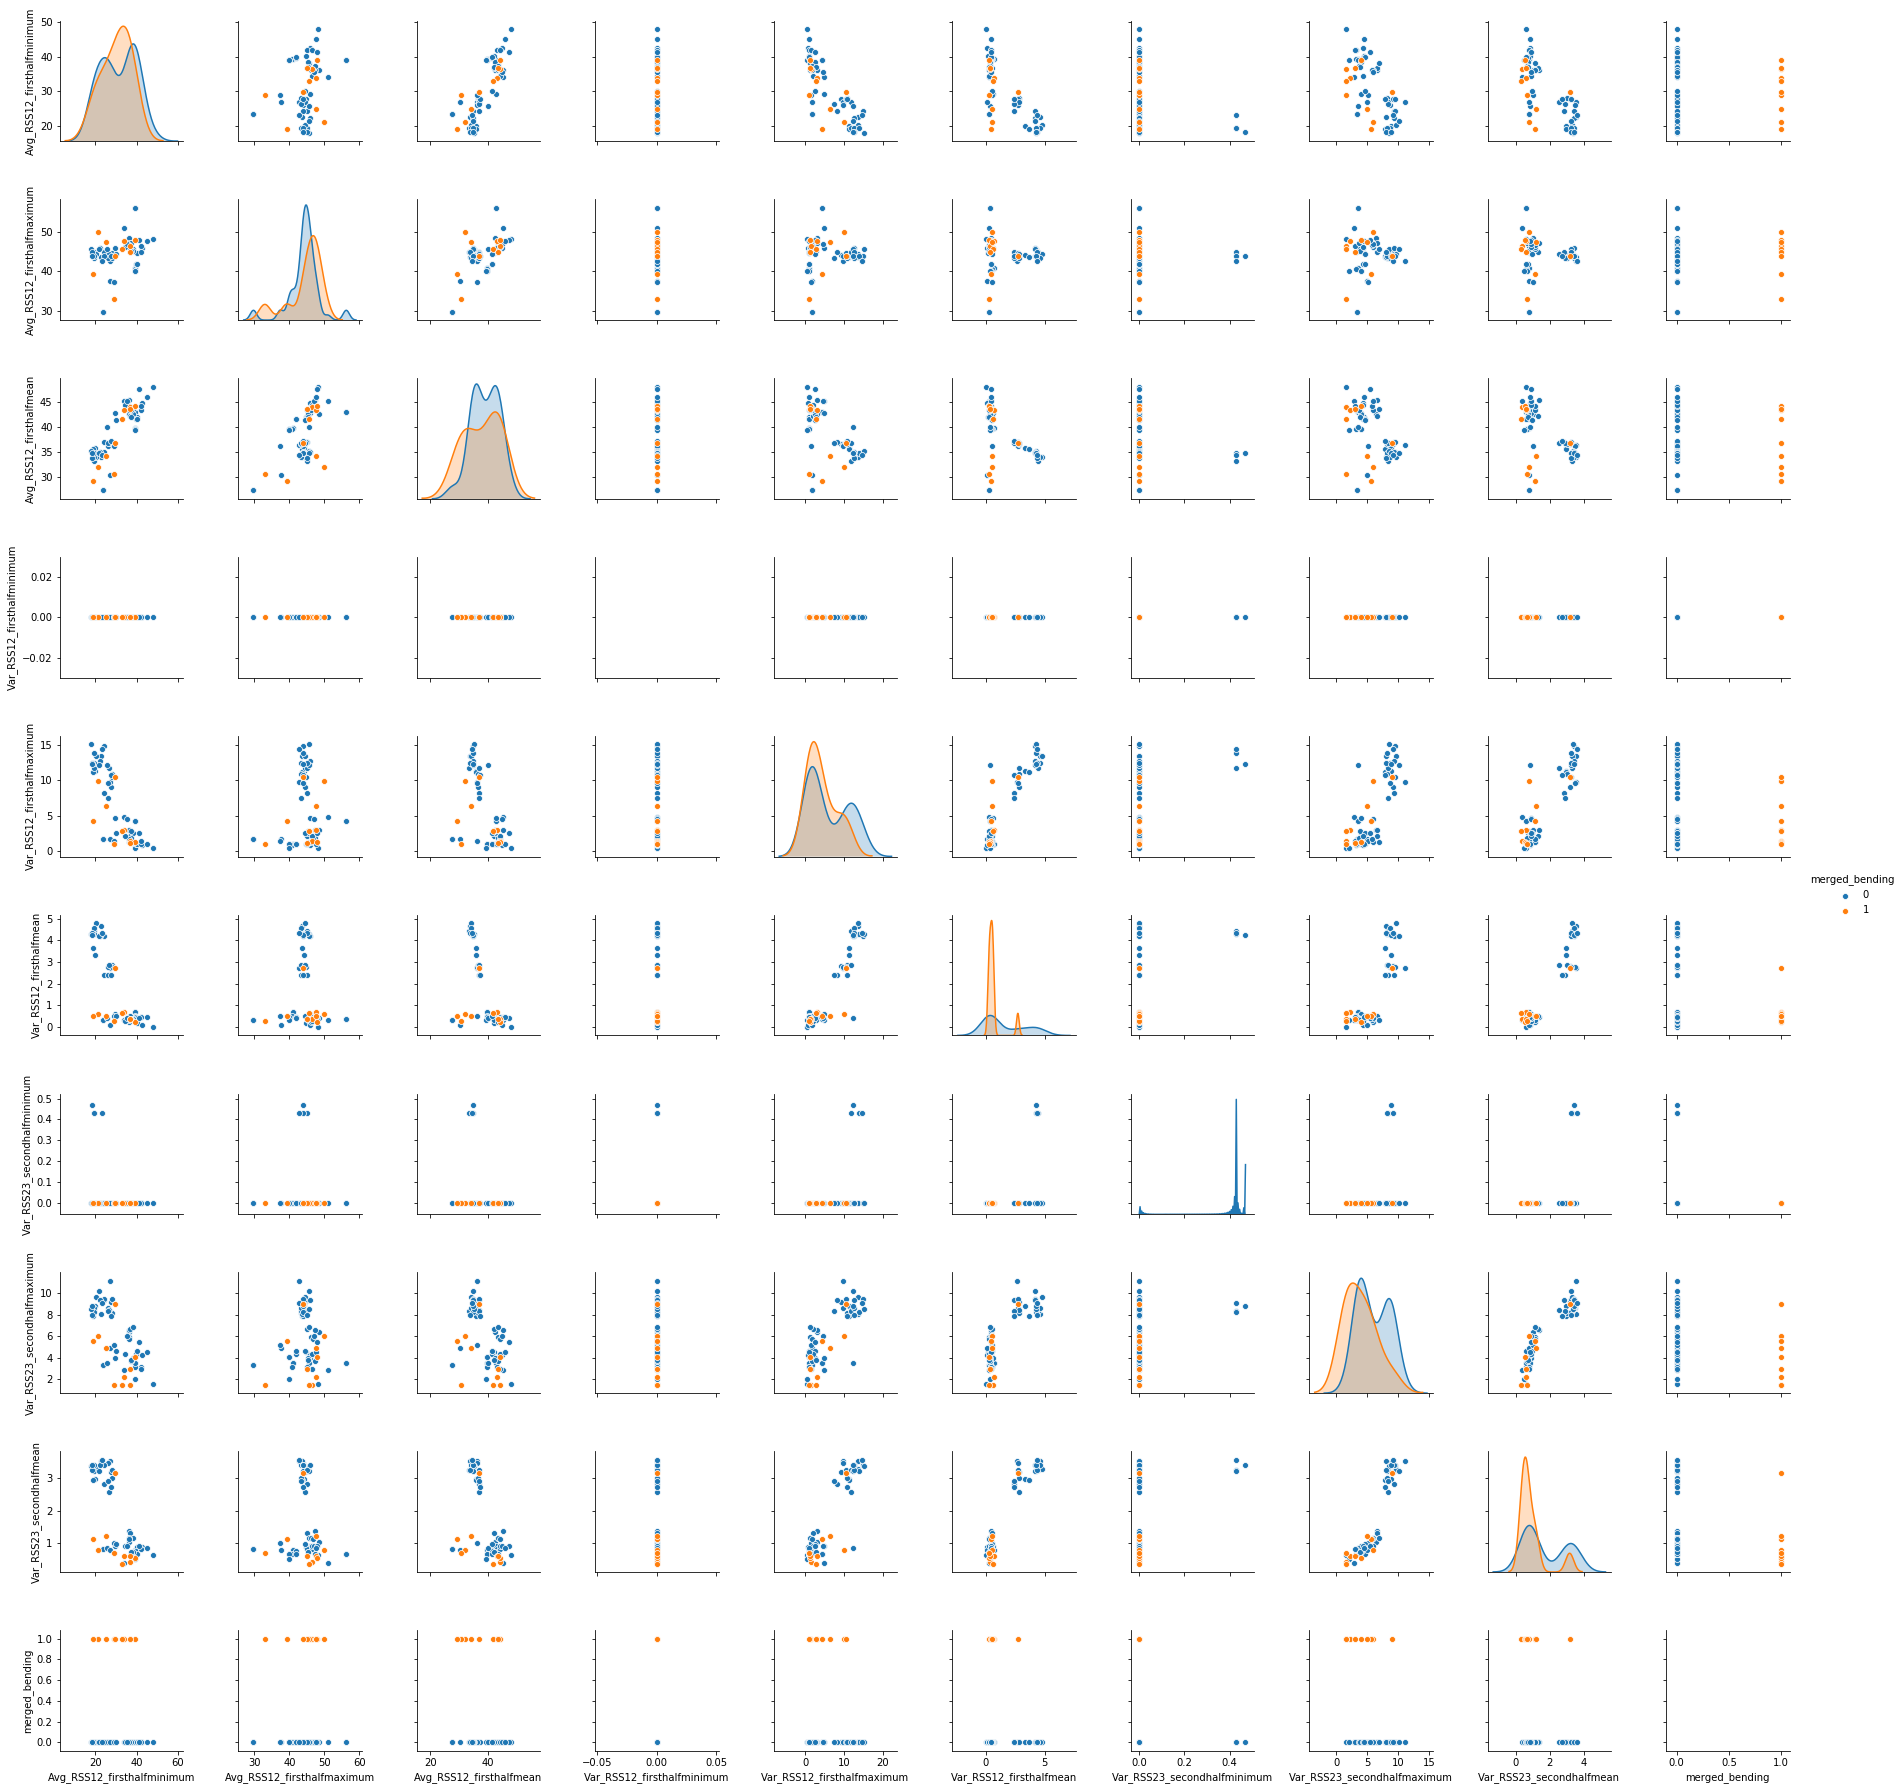

In [20]:
##Since extracted from time series 1, 2, and 6 of each instance, which means avg_rss12, var_rss12，var_rss23
extracted_features_splitdata = time_domain_feature_splitdata[['Avg_RSS12_firsthalfminimum', 'Avg_RSS12_firsthalfmaximum', 'Avg_RSS12_firsthalfmean','Var_RSS12_firsthalfminimum', 'Var_RSS12_firsthalfmaximum', 'Var_RSS12_firsthalfmean','Var_RSS23_secondhalfminimum','Var_RSS23_secondhalfmaximum','Var_RSS23_secondhalfmean']]
##Since we need to differeniate bending vs other activity
##we know that bending constitutes of bending1 and bending2, which total contain 5+5=10 dataset, For dataframe
##in 1c, the first 13 rows of data are bending data, remaining are other activities.
bending_data = [1]*10+[0]*(69-10)
extracted_features_splitdata['merged_bending'] = bending_data

sns.pairplot(extracted_features_splitdata,hue='merged_bending')
##bending data are blue points and other activities' data are yellow point.


##There also no difference with previous pairplot(when data are not splitted)

In [21]:
##d(iii)

                


In [22]:

testing = {}
for l in range(1,21):
    result = []
    for datafram in list(testing_dataset.values()):
        datafram = datafram.drop(["Time"], axis = 1)
        array_split = np.array_split(datafram, l)
        df = pd.DataFrame()
        
        for index,i in enumerate(array_split):
            i.reset_index(drop=True,inplace=True)
            for col in i.columns:
                df[col + str(index+1)] = i[col]
            
        Statistics = []
        feature = []
        for index, col in enumerate(df.columns):
            minimum = min(df[col])
            Statistics.append(minimum)
            feature.append(col + "minimum")

            maximum = max(df[col])
            Statistics.append(maximum)
            feature.append(col + "maximum")

            mean = df[col].mean()
            Statistics.append(mean)
            feature.append(col + "mean")


            median = df[col].median()
            Statistics.append(median)
            feature.append(col + "median")

            sd = df[col].std()
            Statistics.append(sd)
            feature.append(col + "standard deviation")


            Q1 = df[col].quantile(0.25)
            Statistics.append(Q1)
            feature.append(col + "first quartile")

            Q3 = df[col].quantile(0.75)
            Statistics.append(Q3)
            feature.append(col + "third quartile")
            

        result.append(Statistics)
    new_data = pd.DataFrame(result, columns=feature)
    new_data["bending"] = [1]*4 + [0]*15
    testing[l] = new_data
    
for index,value in testing.items():
    value.fillna(0, inplace=True)

In [23]:
training = {}
for l in range(1,21):
    result = []
    for datafram in list(training_dataset.values()):
        datafram = datafram.drop(["Time"], axis = 1)
        array_split = np.array_split(datafram, l)
        df = pd.DataFrame()
        
        for index,i in enumerate(array_split):
            i.reset_index(drop=True,inplace=True)
            for col in i.columns:
                df[col + str(index+1)] = i[col]
            
        Statistics = []
        feature = []
        for index, col in enumerate(df.columns):
            minimum = min(df[col])
            Statistics.append(minimum)
            feature.append(col + "minimum")

            maximum = max(df[col])
            Statistics.append(maximum)
            feature.append(col + "maximum")

            mean = df[col].mean()
            Statistics.append(mean)
            feature.append(col + "mean")


            median = df[col].median()
            Statistics.append(median)
            feature.append(col + "median")

            sd = df[col].std()
            Statistics.append(sd)
            feature.append(col + "standard deviation")


            Q1 = df[col].quantile(0.25)
            Statistics.append(Q1)
            feature.append(col + "first quartile")

            Q3 = df[col].quantile(0.75)
            Statistics.append(Q3)
            feature.append(col + "third quartile")
            

        result.append(Statistics)
    new_data = pd.DataFrame(result, columns=feature)
    new_data["bending"] = [1]*9 + [0]*60
    training[l] = new_data
    
for index,value in training.items():
    value.fillna(0, inplace=True) 


In [24]:

print('yes')

yes


In [25]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

score = {}
selected_feature = {}
for i in range(1,21):
    print('current step: ', str(i))
    lr = LogisticRegression()
    rfecv = RFECV(estimator=lr, cv=StratifiedKFold(5),
                  scoring='accuracy')
    X_training = training[i].drop(["bending"], axis=1)
    y_training = training[i]["bending"]

    rfecv.fit(X_training, y_training)
    useful_feature = []
    for index, col in enumerate(X_training.columns):
        if rfecv.support_[index] == True:
            useful_feature.append(col) 
    selected_feature[i] = useful_feature
    score[i] = rfecv.grid_scores_[rfecv.n_features_ - 1]
    


current step:  1
current step:  2
current step:  3
current step:  4
current step:  5
current step:  6
current step:  7
current step:  8
current step:  9
current step:  10
current step:  11
current step:  12
current step:  13
current step:  14
current step:  15
current step:  16
current step:  17
current step:  18
current step:  19
current step:  20


In [26]:
print(score)

best_col_names = selected_feature[1]
print(best_col_names)
##From this score list, we can find that when feature numbers equal three, the score is highest, which equal to one.
##The wrong way to do this question is using k-fold cross validation to prediction error of final model. Since the classes are inbalanced, The correct way
## to do this question is to splitting data into folds which can ensure each fold has the same proportion of observations with a given categorical value, such as the class outcome value.
##Selected best feature is ['Avg_RSS121mean', 'Avg_RSS121third quartile', 'Var_RSS121maximum', 'Avg_RSS131minimum', 'Avg_RSS131median', 'Avg_RSS131first quartile', 'Avg_RSS231minimum', 'Avg_RSS231maximum', 'Avg_RSS231mean', 'Avg_RSS231first quartile', 'Avg_RSS231third quartile']

{1: 1.0, 2: 0.9857142857142858, 3: 0.9714285714285715, 4: 0.9714285714285715, 5: 0.9571428571428573, 6: 0.9714285714285715, 7: 0.9714285714285715, 8: 0.9560439560439562, 9: 0.9571428571428573, 10: 0.9714285714285715, 11: 0.9571428571428573, 12: 0.9714285714285715, 13: 0.9714285714285715, 14: 0.9714285714285715, 15: 0.9560439560439562, 16: 0.9714285714285715, 17: 0.9571428571428573, 18: 0.9857142857142858, 19: 0.9714285714285715, 20: 0.9714285714285715}
['Avg_RSS121mean', 'Avg_RSS121third quartile', 'Var_RSS121maximum', 'Avg_RSS131minimum', 'Avg_RSS131median', 'Avg_RSS131first quartile', 'Avg_RSS231minimum', 'Avg_RSS231maximum', 'Avg_RSS231mean', 'Avg_RSS231first quartile', 'Avg_RSS231third quartile']


In [27]:
##1d(iv)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
selected_training_x = training[1][['Avg_RSS121mean', 'Avg_RSS121third quartile', 'Var_RSS121maximum', 'Avg_RSS131minimum', 'Avg_RSS131median', 'Avg_RSS131first quartile', 'Avg_RSS231minimum', 'Avg_RSS231maximum', 'Avg_RSS231mean', 'Avg_RSS231first quartile', 'Avg_RSS231third quartile']]
selected_testing_x = testing[1][['Avg_RSS121mean', 'Avg_RSS121third quartile', 'Var_RSS121maximum', 'Avg_RSS131minimum', 'Avg_RSS131median', 'Avg_RSS131first quartile', 'Avg_RSS231minimum', 'Avg_RSS231maximum', 'Avg_RSS231mean', 'Avg_RSS231first quartile', 'Avg_RSS231third quartile']]
selected_training_y = training[1][["bending"]]
selected_testing_y = testing[1][["bending"]]
lr = LogisticRegression(C=1.0)
lr.fit(selected_training_x,selected_training_y)
y_pred = lr.predict(selected_training_x)
confusion = confusion_matrix(selected_training_y,y_pred)
print('Here is confusion matrix:')
print(confusion)


Here is confusion matrix:
[[60  0]
 [ 0  9]]


[[-0.1865721  -0.22535805 -0.22155857 -0.2127812  -0.17148508 -0.1703331
   0.35484003  0.68189658  0.26883743  0.23014803  0.20116527]]


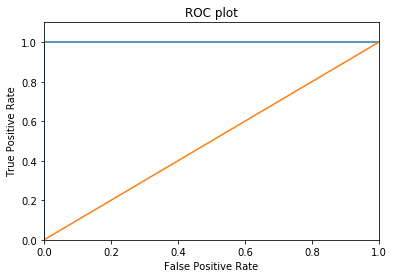

In [28]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve



fpr, tpr, thresholds = roc_curve(selected_training_y, y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot')

##Report the parameters of your logistic regression βi ’s as well as the p-values associated with them
lr = LogisticRegression()
coefficient = lr.fit(selected_training_x,selected_training_y)
print(coefficient.coef_)



In [29]:
from sklearn.datasets import make_classification

import statsmodels.api as sm

res = sm.Logit(selected_training_y,selected_training_x).fit(method="bfgs")
res.summary()
##the summary below is  the parameters of your logistic regression βi ’s as well as the p-values associated with them.

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                bending   No. Observations:                   69
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                           10
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                   1.000
Time:                        17:53:07   Log-Likelihood:            -9.0130e-06
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 6.181e-08
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Avg_RSS121mean              -1.3337   2.06e+05  -6.48e-06      1.000   -4.03e+05    4.03e+05
Avg_RSS121third quartile    -2.7045    3.4e+05  -7.96e-06      1.000   -6.66e+05    6.66e+05
Var_RSS121maximum           -0.8969   8.39e+04  -1.07e-05      1.000   -1.64e+05    1.64e+05
Avg_RSS131minimum           -2.8269   2.42e+05  -1.17e-05      1.000   -4.74e+05    4.74e+05
Avg_RSS131median            -3.0957   6.32e+04   -4.9e-05      1.000   -1.24e+05    1.24e+05
Avg_RSS131first quartile     2.6028   5.51e+04   4.72e-05      1.000   -1.08e+05    1.08e+05
Avg_RSS231minimum            5.2767   2.27e+05   2.33e-05      1.000   -4.45e+05    4.45e+05
Avg_RSS231maximum            4.6868   1.17e+05      4e-05      1.000    -2.3e+05     2.3e+05
Avg_RSS231mean               1.5552   1.12e+06   1.39e-06      1.000   -2.19e+06    2.19e+06
Avg_RSS231first quartile     3.9062   4.51e+05   8.66e-06      1.000   -8.84e+05    8.84e+05
Avg_RSS231third quartile    -3.3808   7.01e+05  -4.83e-06      1.000   -1.37e+06    1.37e+06
============================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [30]:
##1d(v)
##References: https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
logisticRegr = LogisticRegression()
logisticRegr.fit(selected_training_x,selected_training_y)
score = logisticRegr.score(selected_testing_x,selected_testing_y)
print(score)


##I test the classifier on the test set and accuracy is 0.947. cross-validation the highest accuracy I obtained previously is 1.0. Best features are 1.0.

0.9473684210526315


In [31]:
##1d(vi)
##I think so since my accuracy on the test set is 0.947, a very high accuracy.

In [32]:
##1d(vii)
##Yes. There exists imbalanced data.

Here is confusion matrix:
[[60  0]
 [ 0 60]]
[[-0.23252022 -0.22650097 -0.22888664 -0.25609176 -0.20230244 -0.22750573
   0.40734319  0.80020313  0.33449596  0.28890558  0.25838827]]


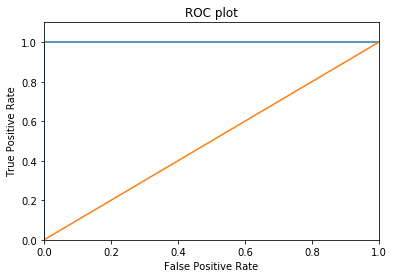

In [33]:
##build a logistic regression model based on case-control sampling and adjust its parameters
##references: https://medium.com/@saeedAR/smote-and-near-miss-in-python-machine-learning-in-imbalanced-datasets-b7976d9a7a79
from sklearn.metrics import classification_report
!pip install imblearn
from imblearn.over_sampling import SMOTE

smt = SMOTE()


# fit predictor and target variable
x_smote, y_smote = smt.fit_resample(selected_training_x,selected_training_y)
lr = LogisticRegression(C=1.0)
lr.fit(x_smote,y_smote)
y_pred = lr.predict(x_smote)
confusion = confusion_matrix(y_smote,y_pred)
print('Here is confusion matrix:')
print(confusion)

fpr, tpr, thresholds = roc_curve(y_smote, y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot')

##Report the parameters of your logistic regression βi ’s as well as the p-values associated with them
lr = LogisticRegression()
coefficient = lr.fit(x_smote,y_smote)
print(coefficient.coef_)

In [34]:
##1e(i)
from sklearn.model_selection import cross_val_score
total_val_score = {}
for i in range(1,20):
    x_training = training[i].drop(["bending"], axis=1)
    y_training = training[i][["bending"]]
    lr = LogisticRegression(C=(i+1), penalty='l1',solver="liblinear")
    val_score = cross_val_score(lr, x_training, y_training, cv=5, scoring = 'accuracy',n_jobs=-1)
    val_score = max(val_score)
    total_val_score[i]=val_score
    
print(total_val_score)

{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0}


In [35]:
##1e(ii)
##L1-penalized logistic regression performs better since validation accuracy score is always 1.0; L1-penalized logistic regression
## is easier to implement.

In [36]:
##1f(i)
from sklearn.linear_model import LogisticRegressionCV
total_cv_score = {}
##test_error
for i in range(1,21):
    x_training_f = training[i].drop(["bending"], axis=1)
    y_training_f = training[i]["bending"]
    x_testing_f = testing[i].drop(["bending"], axis=1)
    y_testing_f = testing[i]["bending"]
    ##bending training dataset = 4+5,other activities training dataset = 15-3 =12
    y_training_f['classification'] = [0]*9 +[1]*12 + [2]*12 +[3]*12 +[4]*12 +[5]*12
    y_testing_f['classification']= [0]*4+[1]*3+[2]*3+[3]*3+[4]*3+[5]*3
    y_training_f = y_training_f.classification
    y_testing_f = y_testing_f.classification
    log_cv = LogisticRegressionCV(cv=5, penalty="l1",solver="liblinear")
    log_cv.fit(x_training_f, y_training_f)
    perlog_cv_score = log_cv.score(x_testing_f,y_testing_f)
    total_cv_score[i] = perlog_cv_score
    
    

In [83]:
print(total_cv_score)
## We know test error = 1- val_score. Since val_score when i=1 is largest. So when i =1, test error is smallest, which equals 1-0.947=0.053

{1: 0.9473684210526315, 2: 0.7894736842105263, 3: 0.7368421052631579, 4: 0.7894736842105263, 5: 0.8421052631578947, 6: 0.8947368421052632, 7: 0.7894736842105263, 8: 0.8421052631578947, 9: 0.8421052631578947, 10: 0.9473684210526315, 11: 0.7894736842105263, 12: 0.8421052631578947, 13: 0.8421052631578947, 14: 0.8421052631578947, 15: 0.8421052631578947, 16: 0.8947368421052632, 17: 0.7894736842105263, 18: 0.8421052631578947, 19: 0.8947368421052632, 20: 0.7894736842105263}


In [84]:
##Confusion matrix in 1f(i)
lr = LogisticRegression()
lr.fit(x_training_f,y_training_f)
y_pred = lr.predict(x_testing_f)
confusion = confusion_matrix(y_testing_f,y_pred)
print('Here is confusion matrix:')
print(confusion)

Here is confusion matrix:
[[3 1 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


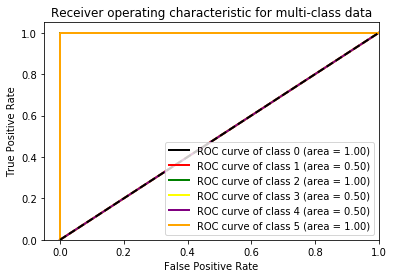

In [85]:
##Plotting ROC plot
##https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=123))
y_score = classifier.fit(x_training_f, y_training_f).predict_proba(x_testing_f)
label_train = label_binarize(y_training_f,classes=[0,1,2,3,4,5])
label_test=label_binarize(y_testing_f,classes=[0,1,2,3,4,5])
CV=OneVsRestClassifier(LogisticRegressionCV(cv=StratifiedKFold(5),penalty="l1",solver="liblinear"))
CV.fit(x_training_f,label_train)
pred=CV.predict(x_testing_f)
cvscore=CV.fit(x_training_f,label_train).decision_function(x_testing_f)
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], threshold = roc_curve(label_test[:, i], cvscore[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['black', 'red', 'green','yellow','purple','orange'])
for i, color in zip(range(6), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label='ROC curve of class {0} (area = {1:0.2f})'
            ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()











In [ ]:
##1f(ii)


In [44]:
##Use GaussianNB to repeat 1f(i)
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_training_f, y_training_f)
GaussianNB_score_list = {}
for i in range(1,21):
    x_training_f_G = training[i].drop(["bending"], axis=1)
    y_training_f_G = training[i]["bending"]
    x_testing_f_G = testing[i].drop(["bending"], axis=1)
    y_testing_f_G = testing[i]["bending"]
    y_training_f_G['classification'] = [0]*9 +[1]*12 + [2]*12 +[3]*12 +[4]*12 +[5]*12
    y_testing_f_G['classification']= [0]*4+[1]*3+[2]*3+[3]*3+[4]*3+[5]*3
    y_training_f_G = y_training_f_G.classification
    y_testing_f_G = y_testing_f_G.classification
    clf = GaussianNB()
    scores = cross_val_score(clf, x_training_f_G, y_training_f_G, cv=5)
    GaussianNB_score_list[i] = max(scores)
GaussianNB_score_list

{1: 1.0,
 2: 1.0,
 3: 0.8461538461538461,
 4: 0.7857142857142857,
 5: 0.7692307692307693,
 6: 0.7857142857142857,
 7: 0.7857142857142857,
 8: 0.8571428571428571,
 9: 0.7142857142857143,
 10: 0.7142857142857143,
 11: 0.7857142857142857,
 12: 0.7692307692307693,
 13: 0.8461538461538461,
 14: 0.6923076923076923,
 15: 0.6428571428571429,
 16: 0.7142857142857143,
 17: 0.6428571428571429,
 18: 0.7142857142857143,
 19: 0.6923076923076923,
 20: 0.6923076923076923}

In [72]:
lr = LogisticRegression()
lr.fit(x_training_f_G,y_training_f_G)
y_pred = lr.predict(x_testing_f_G)
confusion = confusion_matrix(y_testing_f_G,y_pred)
print('Here is confusion matrix:')
print(confusion)

Here is confusion matrix:
[[3 1 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


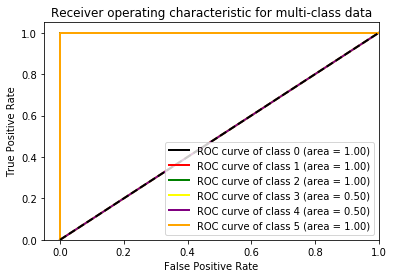

In [80]:
classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=123))
y_score = classifier.fit(x_training_f_G, y_training_f_G).predict_proba(x_testing_f_G)
label_train = label_binarize(y_training_f_G,classes=[0,1,2,3,4,5])
label_test=label_binarize(y_testing_f_G,classes=[0,1,2,3,4,5])
CV=OneVsRestClassifier(LogisticRegressionCV(cv=StratifiedKFold(5),penalty="l1",solver="liblinear"))
CV.fit(x_training_f_G,label_train)
pred=CV.predict(x_testing_f_G)
cvscore=CV.fit(x_training_f_G,label_train).decision_function(x_testing_f_G)
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], threshold = roc_curve(label_test[:, i], cvscore[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['black', 'red', 'green','yellow','purple','orange'])
for i, color in zip(range(6), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [53]:
##Use MultinomialNB to repeat 1f(i)
from sklearn.naive_bayes import MultinomialNB
MultinomialNB_score_list = {}
for i in range(1,21):
    x_training_f_m = training[i].drop(["bending"], axis=1)
    y_training_f_m = training[i]["bending"]
    x_testing_f_m = testing[i].drop(["bending"], axis=1)
    y_testing_f_m = testing[i]["bending"]
    y_training_f_m['classification'] = [0]*9 +[1]*12 + [2]*12 +[3]*12 +[4]*12 +[5]*12
    y_testing_f_m['classification']= [0]*4+[1]*3+[2]*3+[3]*3+[4]*3+[5]*3
    y_training_f_m = y_training_f_m.classification
    y_testing_f_m = y_testing_f_m.classification
    clf = MultinomialNB()
    scores = cross_val_score(clf, x_training_f_m, y_training_f_m, cv=5)
    MultinomialNB_score_list[i] = max(scores)
MultinomialNB_score_list

{1: 0.9285714285714286,
 2: 0.8571428571428571,
 3: 0.8571428571428571,
 4: 0.8571428571428571,
 5: 1.0,
 6: 1.0,
 7: 0.9285714285714286,
 8: 1.0,
 9: 1.0,
 10: 0.9285714285714286,
 11: 0.9285714285714286,
 12: 0.9285714285714286,
 13: 0.9285714285714286,
 14: 0.9285714285714286,
 15: 1.0,
 16: 1.0,
 17: 0.9285714285714286,
 18: 0.9285714285714286,
 19: 0.9285714285714286,
 20: 0.9285714285714286}

In [73]:
lr = LogisticRegression()
lr.fit(x_training_f_m,y_training_f_m)
y_pred = lr.predict(x_testing_f_m)
confusion = confusion_matrix(y_testing_f_m,y_pred)
print('Here is confusion matrix:')
print(confusion)

Here is confusion matrix:
[[3 1 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


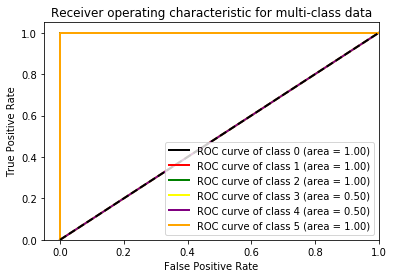

In [88]:
classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=123))
y_score = classifier.fit(x_training_f_m, y_training_f_m).predict_proba(x_testing_f_m)
label_train = label_binarize(y_training_f_m,classes=[0,1,2,3,4,5])
label_test=label_binarize(y_testing_f_m,classes=[0,1,2,3,4,5])
CV=OneVsRestClassifier(LogisticRegressionCV(cv=StratifiedKFold(5),penalty="l1",solver="liblinear"))
CV.fit(x_training_f_m,label_train)
pred=CV.predict(x_testing_f_m)
cvscore=CV.fit(x_training_f_m,label_train).decision_function(x_testing_f_m)
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], threshold = roc_curve(label_test[:, i], cvscore[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['black', 'red', 'green','yellow','purple','orange'])
for i, color in zip(range(6), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
##1f(iii)
##The overall performance of MultinomialNB is better than GaussianNB since MultinomialNB's score is always higher when i
## between 3-20.

In [ ]:
##ISLR 3.7.4
##(a): I think there is not enough evidence to tell. If training data is wobbly, or unstable, cubic is better since it can
##fit more data. However, if training data is truly linear, linear regression model may be better.
##(b): Linear is better in this case since cubic may cause some extents overfitting, which cause higher RSS than in linear
##regression.
##(c): cubic model have lower RSS since it can fit more data and has more coefficients than linear.
##(d): Since we do not know how far it from linear, it's difficult to judge which one has lower RSS.If real relationship
## closer to linear, linear model has lower RSS. If real relationship closer to cubic, cubic has lower RSS.

In [ ]:
##ISLR 4.7.3
## Since we know the Bayes formula is pk(x)= (πke^−(1/2σ2)(x−μk)^2)/(∑Kπle^−(1/2σ2)(x−μl)^2), we can transform it by
## log(pk(x)), which equivalent to logπk−(1/2σ2))(x−μk)^2−log∑Kπle^−((1/2σ2)(x−μl)^2).
## So logπk−(1/2σ2)(x−μk)^2=logπk−x^2/2σ^2+μk/σ^2*x−μ^2k/2σ2. We can see that this function is quadratic, not linear.

In [ ]:
##ISLR 4.7.7
##p1(x) = [0.8e^(-1/(2*(6^2)))*((x-10)^2)]/[(0.8e^(-1/(2*(6^2)))*((x-10)^2))+(0.2e^(-1/(2*(6^2)))*((x-0)^2))]
##since x =4, by plugging value into above formula, we can calculate p1(4)=0.752
##so when known return x=4 in last year, the probability that company will issue dividend is 0.752